
Name of file with COUNT data: Illinois_votes.txt

observed counts = [129, 62, 45, 48, 40, 25, 23, 21, 15]
expected counts = [123, 72, 51, 40, 32, 27, 24, 21, 19] 

First Digit Probabilities:
1: observed: 0.316  expected: 0.301
2: observed: 0.152  expected: 0.176
3: observed: 0.110  expected: 0.125
4: observed: 0.118  expected: 0.097
5: observed: 0.098  expected: 0.079
6: observed: 0.061  expected: 0.067
7: observed: 0.056  expected: 0.058
8: observed: 0.051  expected: 0.051
9: observed: 0.037  expected: 0.046

Chi-squared Test Statistic = 7.019
Critical value at a P-value of 0.05 is 15.51.
Observed distribution matches expected distribution.


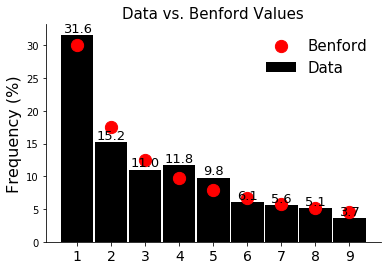

In [3]:
import sys
import math
from collections import defaultdict
import matplotlib.pyplot as plt

# Benford's Law percentages for leading digits 1-9
BENFORD = [30.1, 17.6, 12.5, 9.7, 7.9, 6.7, 5.8, 5.1, 4.6]

def load_data(filename):
    """Open a text file & return a list of strings."""
    with open(filename) as f:
        return f.read().strip().split('\n')
    
def count_first_digits(data_list):
    """Count 1st digits in list of numbers; return counts & frequency."""
    first_digits = defaultdict(int)  # default value of int is 0
    for sample in data_list:
        if sample == '':
            continue
        try:
            int(sample)
        except ValueError as e:
            print(e, file=sys.stderr)
            print("Samples must be integers. Exiting.", file=sys.stderr)
            sys.exit(1)
        first_digits[sample[0]] += 1  
        
    # check for missing digits
    keys = [str(digit) for digit in range(1, 10)]
    for key in keys:
        if key not in first_digits:
            first_digits[key] = 0
            
    data_count = [v for (k, v) in sorted(first_digits.items())]
    total_count = sum(data_count)
    data_pct = [(i / total_count) * 100 for i in data_count]
    return data_count, data_pct, total_count

def get_expected_counts(total_count):
    """Return list of expected Benford's Law counts for total sample count."""
    return [round(p * total_count / 100) for p in BENFORD]

def chi_square_test(data_count, expected_counts):
    """Return boolean on chi-square test (8 degrees of freedom & P-val=0.05)."""
    chi_square_stat = 0  # chi square test statistic
    for data, expected in zip(data_count, expected_counts):
        chi_square = math.pow(data - expected, 2)
        chi_square_stat += chi_square / expected
    print("\nChi-squared Test Statistic = {:.3f}".format(chi_square_stat))
    print("Critical value at a P-value of 0.05 is 15.51.")    
    return chi_square_stat < 15.51

def bar_chart(data_pct):
    """Make bar chart of observed vs expected 1st digit frequency in percent."""
    fig, ax = plt.subplots()

    index = [i + 1 for i in range(len(data_pct))]  # 1st digits for x-axis

    # text for labels, title and ticks
    fig.canvas.set_window_title('Percentage First Digits')
    ax.set_title('Data vs. Benford Values', fontsize=15)
    ax.set_ylabel('Frequency (%)', fontsize=16)
    ax.set_xticks(index)
    ax.set_xticklabels(index, fontsize=14)

    # build bars    
    rects = ax.bar(index, data_pct, width=0.95, color='black', label='Data')

    # attach a text label above each bar displaying its height
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, height,
                '{:0.1f}'.format(height), ha='center', va='bottom', 
                fontsize=13)

    # plot Benford values as red dots
    ax.scatter(index, BENFORD, s=150, c='red', zorder=2, label='Benford')

    # Hide the right and top spines & add legend
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.legend(prop={'size':15}, frameon=False)
    
    plt.show()

def main():
    # load data
    while True:
        filename = input("\nName of file with COUNT data: ")
        try:
            data_list = load_data(filename)
        except IOError as e:
            print("{}. Try again.".format(e), file=sys.stderr)
        else:
            break
    data_count, data_pct, total_count = count_first_digits(data_list)
    expected_counts = get_expected_counts(total_count)
    print("\nobserved counts = {}".format(data_count))
    print("expected counts = {}".format(expected_counts), "\n")
    
    print("First Digit Probabilities:")
    for i in range(1, 10):
        print("{}: observed: {:.3f}  expected: {:.3f}".
              format(i, data_pct[i - 1] / 100, BENFORD[i - 1] / 100))

    if chi_square_test(data_count, expected_counts):
        print("Observed distribution matches expected distribution.")
    else:
        print("Observed distribution does not match expected.", file=sys.stderr)       

    bar_chart(data_pct)    
        
if __name__ == '__main__':
    main()